In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = '/Users/nams/Downloads/Fulldata_initiator_19delay.dat'
#filename = '/Users/nams/Downloads/Fulldata_initiator_9delay.dat'


def load_file(filename):
    data = np.loadtxt(filename, dtype=int, delimiter=",")
    data = np.array(data)
    d = data.flatten()
    return d

def calc_cross(signal):
    width = 4e-3
    f = 25000
    fs = 64000
    t = np.arange(fs*width) / fs

    cosine = np.cos(2*np.pi*f*t)
    sine = np.cos(2*np.pi*f*t)

    c_cross = np.correlate(signal, cosine)
    s_cross = np.correlate(signal, sine)
    crossP = c_cross*c_cross + s_cross*s_cross
    
    return crossP

In [58]:
d = load_file(filename)

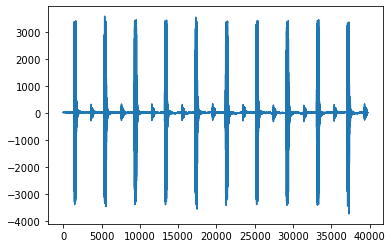

In [59]:
%matplotlib inline
plt.figure()
plt.plot(d)

In [60]:
def sg(x, k=25*4):
    Pxx = []
    N = 64*4
    # k = 26*4
    w = 2*np.pi*k/N;
    cw = np.cos(w);
    c = 2*cw;
    sw = np.sin(w);
    # Initialize... no sliding because there aren't enough samples
    z1=0;
    z2=0;
    for idx in range(N):
        z0 = x[idx] + c*z1 -z2;
        z2 = z1;
        z1 = z0;

    # I = cw*z1 -z2;
    # Q = sw*z1;

    P = z2*z2 + z1*z1 - c * z1*z2
    print('P',P)
    Pxx.append(P)
    # return I, Q, P

    while (idx < (len(x)-1)):
        idx += 1
        z0 = x[idx] - x[idx-N] + c*z1 -z2;
        z2 = z1;
        z1 = z0;

        P = z2*z2 + z1*z1 - c * z1*z2
        Pxx.append(P)

    return np.array(Pxx)

In [61]:
filtered = sg(d)

P 431.5128633026124


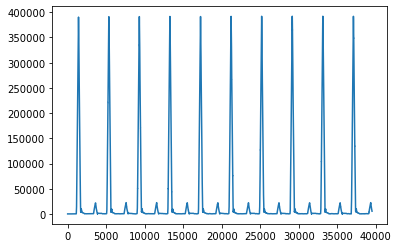

In [62]:
plt.plot(filtered**0.5)

In [63]:
crossP = calc_cross(d)

<IPython.core.display.Javascript object>


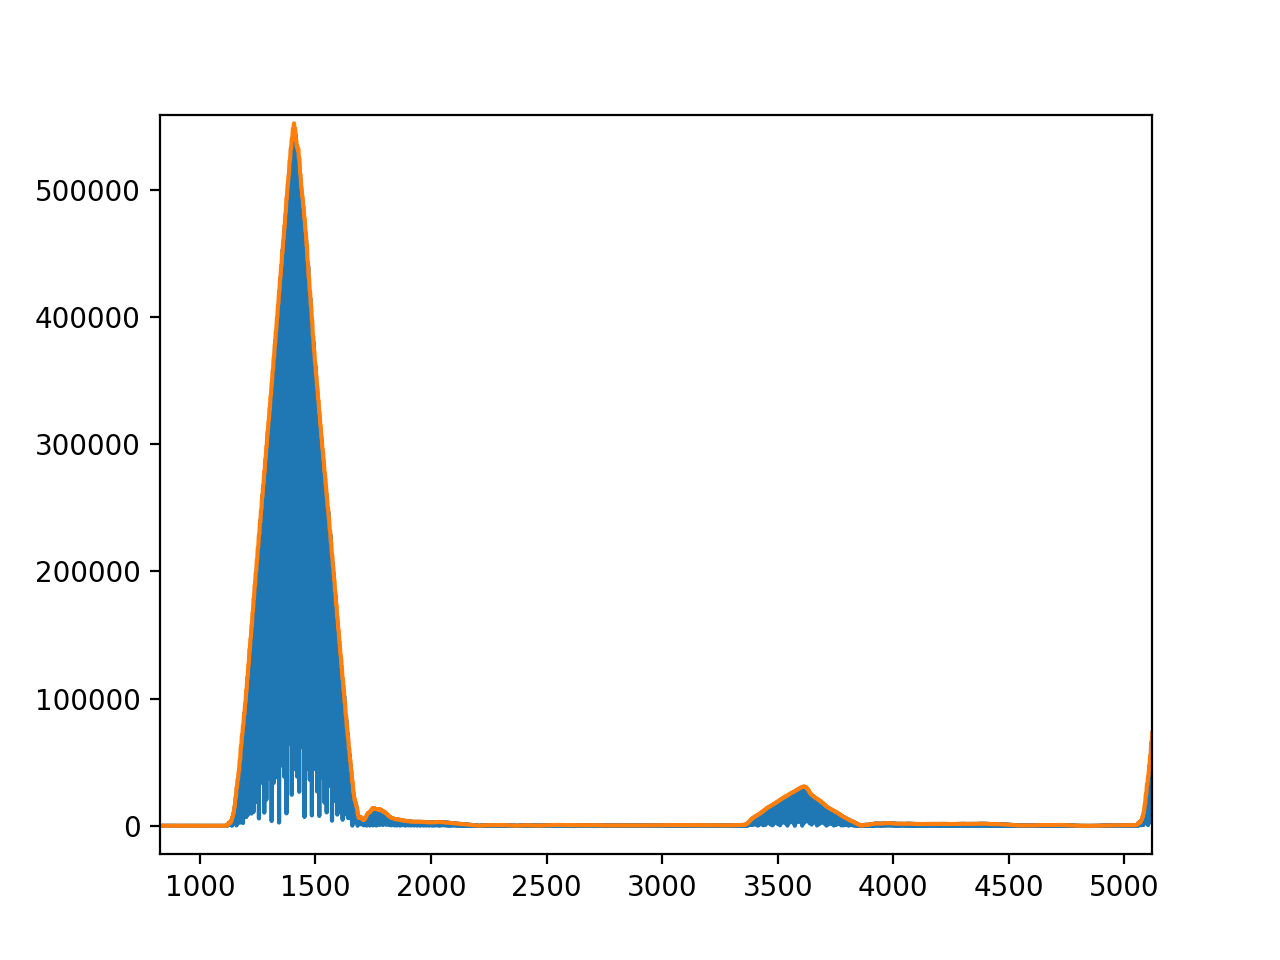

In [66]:
plt.plot(crossP**0.5)
plt.plot((2*filtered)**0.5)

In [65]:
%matplotlib notebook

In [23]:
np.fromfile(filename, sep=',', dtype=int)

/var/folders/3t/7ztd8ysx38l1xvfndk0pq994000k7f/T/ipykernel_59963/561166866.py:1: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  np.fromfile(filename, sep=',', dtype=int)


array([35, 37, 34, 35, 35, 34, 38, 36, 38, 38, 34, 37, 36, 39, 37, 34, 38,
       36, 38, 39, 35, 36, 37, 39, 40, 38, 37, 35, 37, 33, 33, 35, 33, 39,
       35, 33, 37, 33, 37, 39, 36, 37, 29, 31, 32, 28, 30, 32, 35, 34, 30,
       28, 30, 35, 35, 30, 28, 31, 30, 30, 37, 33, 26, 27])

In [26]:
np.loadtxt(filename, dtype=int, sep=",")

TypeError: loadtxt() got an unexpected keyword argument 'sep'

In [27]:
data = np.loadtxt(filename, dtype=int)

ValueError: invalid literal for int() with base 10: '35,37,34,35,35,34,38,36,38,38,34,37,36,39,37,34,38,36,38,39,35,36,37,39,40,38,37,35,37,33,33,35,33,39,35,33,37,33,37,39,36,37,29,31,32,28,30,32,35,34,30,28,30,35,35,30,28,31,30,30,37,33,26,27'

In [36]:
d = np.loadtxt(filename, dtype=int, delimiter=',')
d.flatten()

array([35, 37, 34, ..., 19, 24, 19])

In [40]:
a = np.arange(9)


In [42]:
a.shape=(3,3)

In [44]:
a.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [69]:
((2*filtered)**0.5).tofile('19ms_initiator_goertzel')

In [70]:
ls -rtl


total 62288
-rw-r--r--@  1 nams  18670   5120000 Nov  2 14:05 single_tone.dat
-rw-r--r--@  1 nams  18670   5120000 Nov  3 14:21 single_tone_v2.dat
-rw-r--r--   1 nams  18670       194 Nov  3 17:07 test_cos.c
-rw-r--r--   1 nams  18670      1424 Nov  4 09:21 goertzel.c
-rw-r--r--   1 nams  18670       278 Nov  4 12:33 test_adder.py
-rw-r--r--   1 nams  18670       408 Nov  4 12:33 add_new.c
-rw-r--r--   1 nams  18670       320 Nov  4 12:34 add.c
-rwxr-xr-x   1 nams  18670     16520 Nov  4 12:34 adder.so*
-rw-r--r--@  1 nams  18670       643 Nov  4 12:36 test_cffi.zip
-rw-r--r--   1 nams  18670      1564 Nov  4 12:37 Untitled.ipynb
-rw-r--r--   1 nams  18670    295292 Nov  4 12:41 single_tone.ipynb
-rw-r--r--   1 nams  18670       798 Nov  4 17:38 read.c
-rw-r--r--   1 nams  18670  10237960 Nov  4 17:45 sliding_goertzel.dat
-rw-r--r--   1 nams  18670   9594082 Nov  4 17:46 sg.zip
-rwxr-xr-x   1 nams  18670     49456 Nov  4 17:54 goertzel.so*
-rw-r--r--   1 nams  18670      1283 Nov  5 08

In [72]:
len(filtered)

39489

In [73]:
39489*8

315912

In [82]:
raw = np.fromfile('19ms_initiator_goertzel', dtype=np.float64)

In [75]:
raw.shape

(39489,)

In [83]:
((2*filtered)**0.5) - raw

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
!open .


In [84]:
-10 % 3


2